In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

# path = "copied path"
# df_bonus = pd.read_csv(path)# Dataset is now stored in a Pandas Dataframe

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Absenteeism_at_work.csv to Absenteeism_at_work.csv


In [12]:
df = pd.read_csv(io.BytesIO(uploaded['Absenteeism_at_work.csv']), delimiter=';')

# Dataset is now stored in a Pandas Dataframe
data = df.to_numpy()
#print(data[:10])

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
[[ 11.     26.      7.      3.      1.    289.     36.     13.     33.
  239.554  97.      0.      1.      2.      1.      0.      1.     90.
  172.     30.      4.   ]
 [ 36.      0.      7.      3.      1.    118.     13.     18.     50.
  239.554  97.      1.      1.      1.      1.      0.      0.     98.
  178.     31.      0.   ]
 [  3.     23.      7.      4.      1.    179.     51.     18.     38.
  239.554  97.      0.      1.      0.      1.      0.      0.     89.
  170.     31.      2.   ]
 [  7.      7.      7.      5.      1.    279.      5.     14.     39.
 

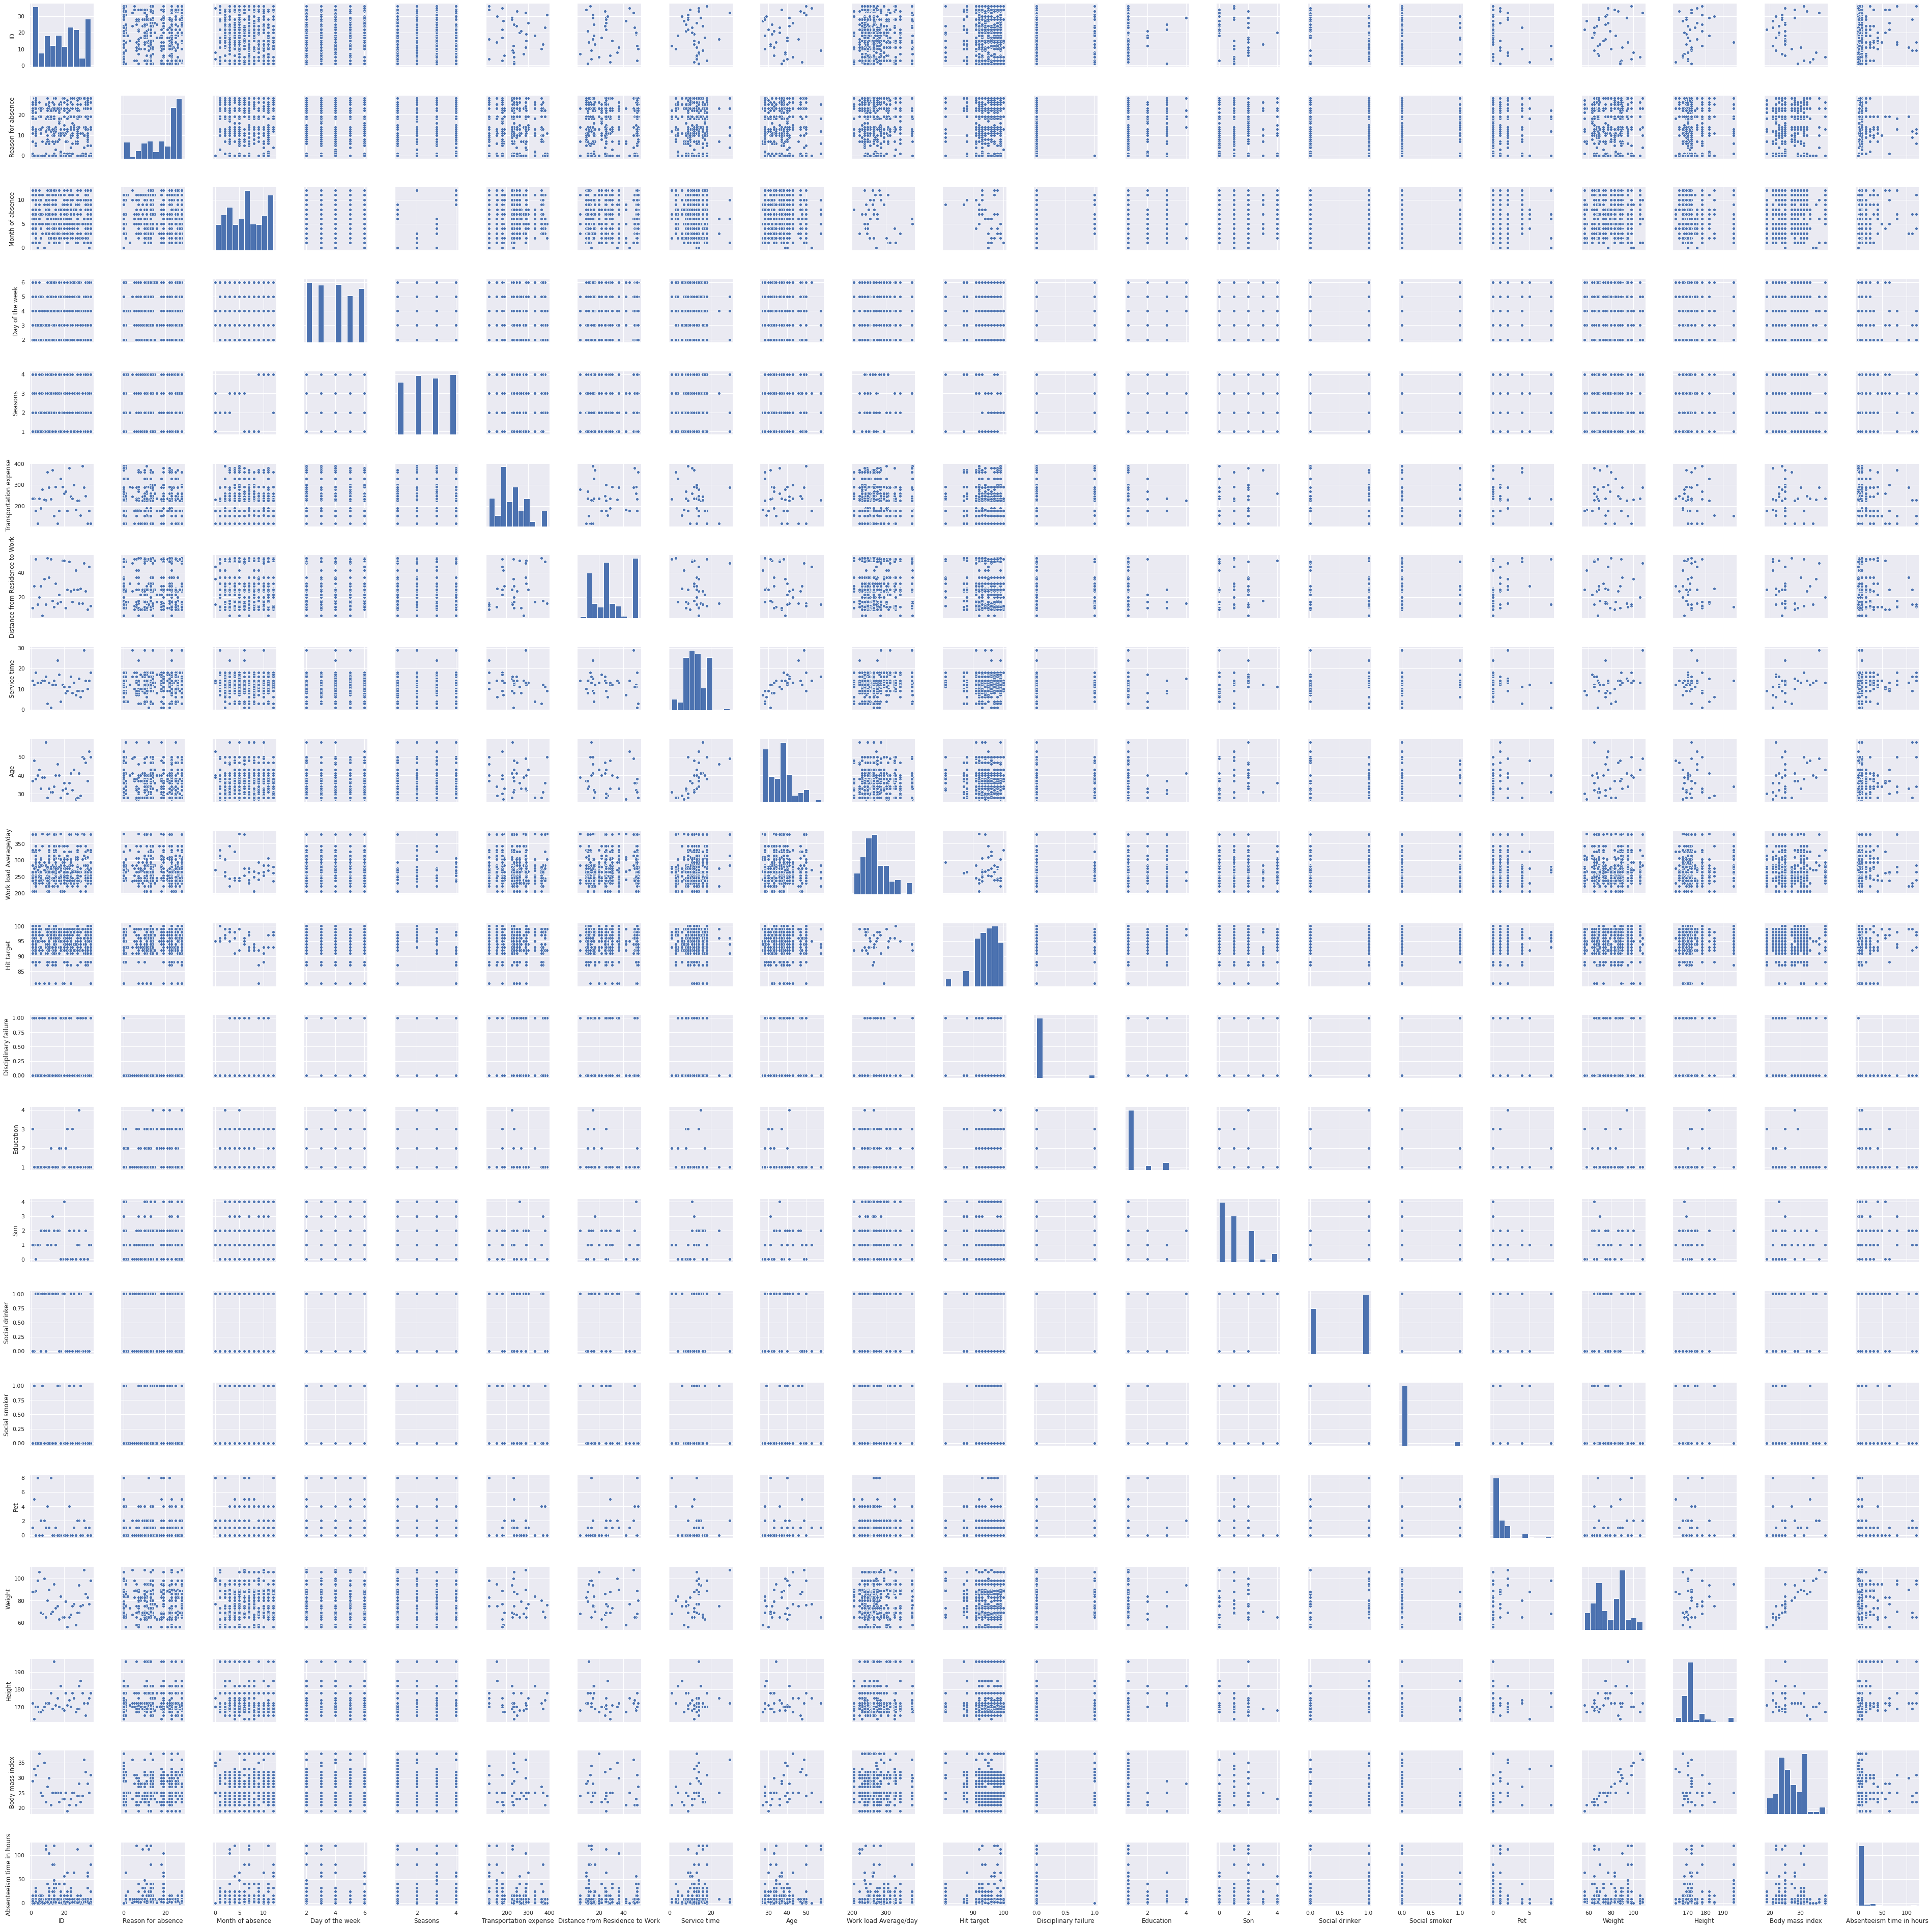

In [13]:
%matplotlib inline
sns.set()
cols = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

df = pd.DataFrame(data, columns=cols)
sns.pairplot(df)

As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [17]:
# select features: reason, transport expenses, distance travelled, service time, age, BMI
data_sel = data[:, [1,5,6,7,8,19,20]]
cols = [ 'Reason for absence', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Body mass index',
       'Absenteeism time in hours']

print(data_sel[:10])


[[ 26. 289.  36.  13.  33.  30.   4.]
 [  0. 118.  13.  18.  50.  31.   0.]
 [ 23. 179.  51.  18.  38.  31.   2.]
 [  7. 279.   5.  14.  39.  24.   4.]
 [ 23. 289.  36.  13.  33.  30.   2.]
 [ 23. 179.  51.  18.  38.  31.   2.]
 [ 22. 361.  52.   3.  28.  27.   8.]
 [ 23. 260.  50.  11.  36.  23.   4.]
 [ 19. 155.  12.  14.  34.  25.  40.]
 [ 22. 235.  11.  14.  37.  29.   8.]]


In [29]:

# PART 1: Normalize the data using standard deviation --> z-score standartization
data_std = (data_sel - np.mean(data_sel, axis=0)) / np.std(data_sel, axis=0)

# PART 2: Normalize using range
data_norm = (data_sel - np.mean(data_sel, axis=0) / np.max(data_sel, axis=0) - np.min(data_sel, axis=0))

print(np.round(data_norm[:10]))

[ 28. 388.  52.  29.  58.  38. 120.]
[  0. 118.   5.   1.  27.  19.   0.]
[[ 25. 170.  30.  12.   5.  10.   4.]
 [ -1.  -1.   7.  17.  22.  11.  -0.]
 [ 22.  60.  45.  17.  10.  11.   2.]
 [  6. 160.  -1.  13.  11.   4.   4.]
 [ 22. 170.  30.  12.   5.  10.   2.]
 [ 22.  60.  45.  17.  10.  11.   2.]
 [ 21. 242.  46.   2.   0.   7.   8.]
 [ 22. 141.  44.  10.   8.   3.   4.]
 [ 18.  36.   6.  13.   6.   5.  40.]
 [ 21. 116.   5.  13.   9.   9.   8.]]


## plot z-score standardized

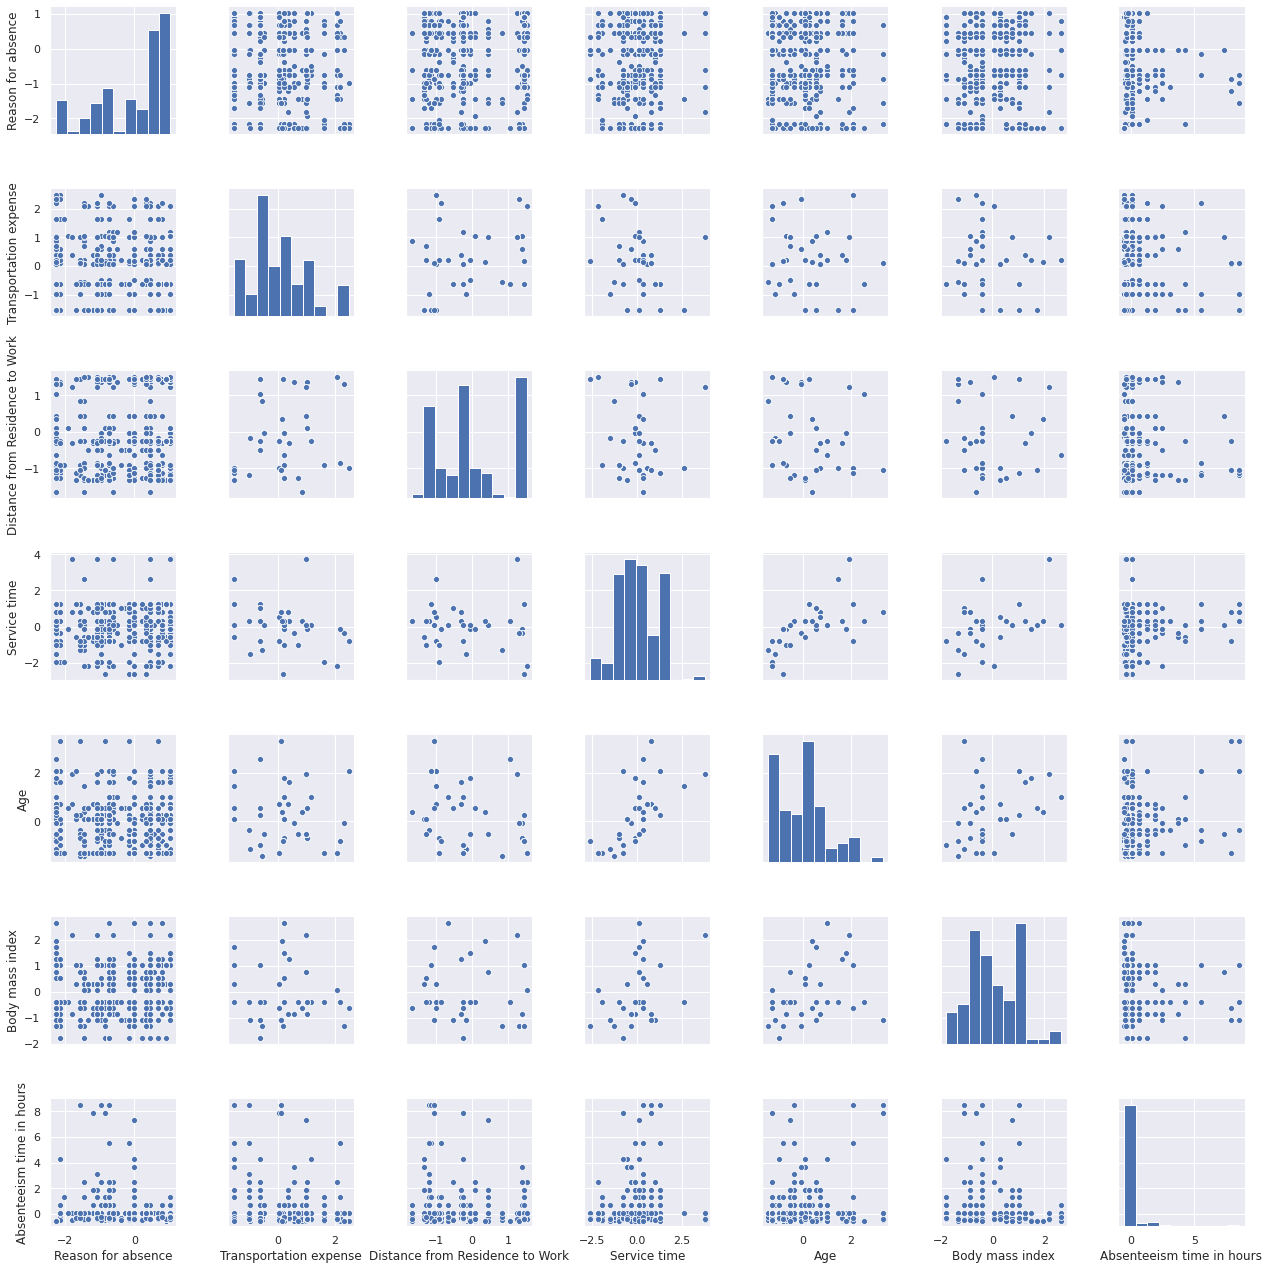

In [30]:
df_std = pd.DataFrame(data_std, columns=cols)
sns.pairplot(df_std)

## plot range normalized


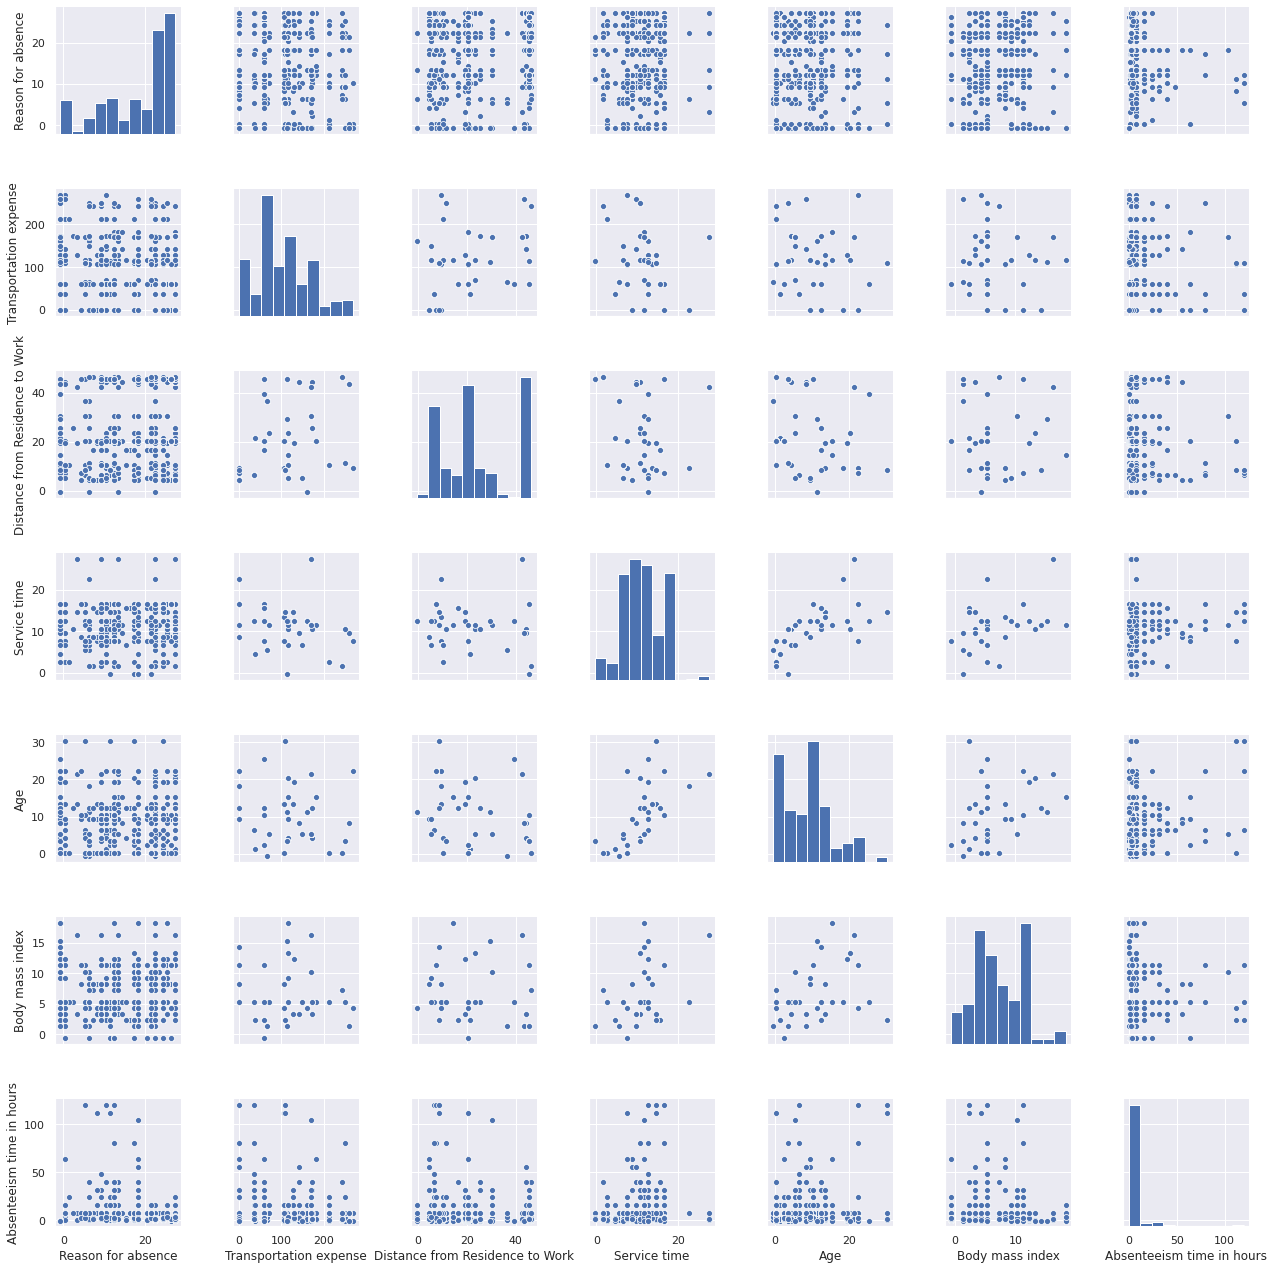

In [31]:
df_norm = pd.DataFrame(data_norm, columns=cols)
sns.pairplot(df_norm)

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the autocovariance matrix and afterwards the eigenvalues. When the data is normalized the autocovariance is calculated as
$$C = X^T\cdot X$$
with $X$ being an $m \times n$ matrix with $n$ features and $m$ samples.
The entry $c_{i,j}$ in $C$ tells you how much feature $i$ correlates with feature $j$. 
(Note: sometimes the formula $C=X\cdot X^T$ can be found, i.e., with rows and columns swapped. This depends on whether your put the individual datapoints as rows or columns in you matrix $X$. However, in the end you want to know how the individual features correlate, i.e., in our example you want a $11\times11$-matrix).

In [0]:

# TODO: Compute the autocovariance matrix and store it into autocovar
autocovar = data_std.T @ data_std

# TODO: Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
eigenval, eigenvec = np.linalg.eig(autocovar)

# Alternatively, np.linalg.eig solves the eigenvector problem for general matrices, while eigh
# only solves it for symmetric/hermitian matrices. (The auto-covariance matrix is always symmetric.)

# eigenval, eigenvec = np.linalg.eig(autocovar)

# If you wanted to use the singular value decomposition (SVD), you would have to use the centered 
# version of cars:

# u, s, v = np.linalg.svd(cars-np.mean(cars, 0))
# eigenval, eigenvec = s ** 2, v

# However, this method usually leads to different results (there are some numerical issues).
# For a more detailed overview over different methods of PCA check the file "PCA Comparison.ipynb".
# In most cases these difference don't matter much, but it is always wise to handle your results
# with a certain critical eye.


Plot the spectrum of the eigenvalues to make sure that they are sorted by their magnitude. How many principal components to include based on the spectrum plot?

<BarContainer object of 7 artists>

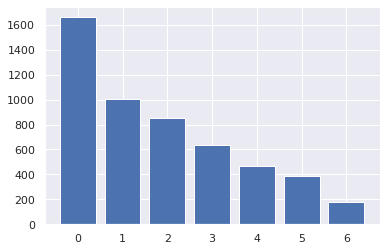

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

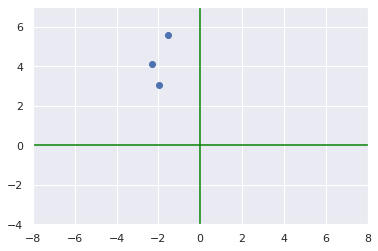

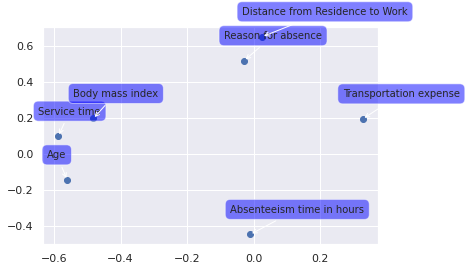

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = data_norm @ eigenvec[:,0:2]

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca().set_xlim(-8, 8)
fig.gca().set_ylim(-4, 7)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = cols
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()